In [ ]:
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Load data
credit_score = pd.read_csv('/content/credit_score.csv')

# Select features
df_features = credit_score.drop(['CUST_ID','CAT_GAMBLING',
  'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT',
  'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT'], axis=1)

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled ,columns=df_features.columns)

In [ ]:
pd.set_option('display.max_columns', None)
credit_score.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,R_CLOTHING_SAVINGS,R_CLOTHING_DEBT,T_EDUCATION_12,T_EDUCATION_6,R_EDUCATION,R_EDUCATION_INCOME,R_EDUCATION_SAVINGS,R_EDUCATION_DEBT,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,R_ENTERTAINMENT,R_ENTERTAINMENT_INCOME,R_ENTERTAINMENT_SAVINGS,R_ENTERTAINMENT_DEBT,T_FINES_12,T_FINES_6,R_FINES,R_FINES_INCOME,R_FINES_SAVINGS,R_FINES_DEBT,T_GAMBLING_12,T_GAMBLING_6,R_GAMBLING,R_GAMBLING_INCOME,R_GAMBLING_SAVINGS,R_GAMBLING_DEBT,T_GROCERIES_12,T_GROCERIES_6,R_GROCERIES,R_GROCERIES_INCOME,R_GROCERIES_SAVINGS,R_GROCERIES_DEBT,T_HEALTH_12,T_HEALTH_6,R_HEALTH,R_HEALTH_INCOME,R_HEALTH_SAVINGS,R_HEALTH_DEBT,T_HOUSING_12,T_HOUSING_6,R_HOUSING,R_HOUSING_INCOME,R_HOUSING_SAVINGS,R_HOUSING_DEBT,T_TAX_12,T_TAX_6,R_TAX,R_TAX_INCOME,R_TAX_SAVINGS,R_TAX_DEBT,T_TRAVEL_12,T_TRAVEL_6,R_TRAVEL,R_TRAVEL_INCOME,R_TRAVEL_SAVINGS,R_TRAVEL_DEBT,T_UTILITIES_12,T_UTILITIES_6,R_UTILITIES,R_UTILITIES_INCOME,R_UTILITIES_SAVINGS,R_UTILITIES_DEBT,T_EXPENDITURE_12,T_EXPENDITURE_6,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,0.0000,0.0035,0,0,0.5044,0.0000,0.1404,0.000,3068,1554,0.5065,0.0922,0.0000,0.0058,0,0,1.3634,0.0000,0.0026,0.0000,1313,605,0.4608,0.0395,0.0000,0.0025,4849,2753,0.5677,0.1458,0.0000,0.0091,320,0,0.3314,0.0096,0.0055,0.0006,3006,1521,0.5060,0.0904,0.0000,0.0056,0,0,0.5322,0.0000,0.0276,0.0000,17893,11439,0.6393,0.5378,0.0000,0.0336,931,469,0.5038,0.0280,0.0655,0.0017,33269,19286,0.5797,1.0000,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,0.0638,0.0184,0,0,0.5001,0.0000,0.0000,0.000,17244,8694,0.5042,0.2235,0.1891,0.0546,0,0,1.0542,0.0000,0.0000,0.0000,0,0,0.5431,0.0000,0.0000,0.0000,5224,2386,0.4567,0.0677,0.0573,0.0166,467,110,0.2355,0.0061,0.0051,0.0015,16339,8269,0.5061,0.2118,0.1792,0.0518,1973,988,0.5008,0.0256,0.0216,0.0063,20234,3133,0.1548,0.2622,0.2219,0.0641,2845,1423,0.5002,0.0369,0.0312,0.0090,70144,25114,0.3580,0.9091,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,0.0535,0.0022,0,0,0.5022,0.0000,0.0000,0.000,3611,2231,0.6178,0.1168,0.1669,0.0068,36,36,1.0000,0.0012,0.0017,0.0001,1201,609,0.5071,0.0388,0.0555,0.0022,4335,2418,0.5578,0.1402,0.2003,0.0081,891,387,0.4343,0.0288,0.0412,0.0017,2759,1395,0.5056,0.0892,0.1275,0.0052,0,0,0.5166,0.0000,0.0000,0.0000,16072,9251,0.5756,0.5198,0.7426,0.0300,855,431,0.5041,0.0277,0.0395,0.0016,30917,17618,0.5698,1.0000,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,0.1063,0.0109,4402,2215,0.5032,0.0546,0.0682,0.007,13446,6849,0.5094,0.1667,0.2084,0.0214,0,0,0.0000,0.0000,0.0000,0.0000,7796,4056,0.5203,0.0967,0.1208,0.0124,4547,2355,0.5179,0.0564,0.0705,0.0072,2068,795,0.3844,0.0256,0.0320,0.0033,12619,6387,0.5061,0.1565,0.1956,0.0201,1675,915,0.5463,0.0208,0.0260,0.0027,25038,11835,0.4727,0.3104,0.3880,0.0398,2209,1112,0.5034,0.0274,0.0342,0.0035,80657,40205,0.4985,1.0000,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,0.0017,0.0008,0,0,0.5029,0.0000,0.0000,0.000,5194,2675,0.5150,0.0346,0.0044,0.0022,0,0,0.5872,0.0000,0.0000,0.0000,1734,912,0.5260,0.0116,0.0015,0.0007,34814,15369,0.4415,0.2321,0.0297,0.0145,7513,2581,0.3435,0.0501,0.0064,0.0031,42658,21589,0.5061,0.2844,0.0364,0.0178,3941,1794,0.4552,0.0263,0.0034,0.0016,28167,12334,0.4379,0.1878,0.0240,0.0117,10338,5190,0.5020,0.0689,0.0088,0.0043,136337,62766,0.4604,0.9091,0.1163,0.0568,High,1,1,1,1,1,473,0


In [ ]:
credit_score.shape

(1000, 87)

In [ ]:
credit_score["CAT_GAMBLING"].nunique()

3

In [ ]:
# Ensure all rows are displayed
pd.set_option('display.max_rows', None)

# Get and display sorted unique counts
unique_counts_sorted = credit_score.nunique().sort_values()
print(unique_counts_sorted)

CAT_DEPENDENTS                2
DEFAULT                       2
CAT_DEBT                      2
CAT_CREDIT_CARD               2
CAT_MORTGAGE                  2
CAT_SAVINGS_ACCOUNT           2
CAT_GAMBLING                  3
R_HOUSING                    14
R_FINES_DEBT                 24
R_FINES_SAVINGS              45
T_FINES_6                    48
R_FINES_INCOME               51
T_FINES_12                   71
R_EXPENDITURE_INCOME         72
R_EDUCATION                 102
R_UTILITIES                 102
R_EXPENDITURE_SAVINGS       210
R_GAMBLING_DEBT             228
R_EDUCATION_DEBT            234
R_TAX_DEBT                  253
R_GAMBLING_SAVINGS          257
R_TAX                       257
CREDIT_SCORE                259
R_EXPENDITURE_DEBT          280
R_GAMBLING_INCOME           304
R_EDUCATION_SAVINGS         324
R_TAX_SAVINGS               351
T_GAMBLING_6                361
R_EDUCATION_INCOME          365
T_EDUCATION_6               375
T_GAMBLING_12               377
T_EDUCAT

In [ ]:
# Separate continuous and categorical columns
continuous_cols = credit_score.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = credit_score.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

print("Continuous columns:")
print(continuous_cols)

print("\nCategorical columns:")
print(categorical_cols)

Continuous columns:
['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING', 'R_HOUSING_INCOME', 'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12', 'T_TA

In [ ]:
threshold = 10

continuous_cols = []
discrete_cols = []
categorical_cols = []

for col in credit_score.columns:
    if pd.api.types.is_numeric_dtype(credit_score[col]):
        if credit_score[col].nunique() <= threshold:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)
    else:
        categorical_cols.append(col)

print("Continuous columns:")
print(continuous_cols)
print("\nDiscrete numeric columns:")
print(discrete_cols)
print("\nCategorical columns (non-numeric):")
print(categorical_cols)

Continuous columns:
['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING', 'R_HOUSING_INCOME', 'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12', 'T_TA

In [ ]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(78, 1000)

In [ ]:
# Perform hierarchical clustering on features
linked = linkage(df_transposed , method='ward', metric='euclidean')

np.shape(linked)

(77, 4)

In [ ]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size'])
df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')

df_linked.head(10)

,c1,c2,distance,size
0,48,49,0.001115,2
1,12,13,0.110213,2
2,66,67,0.140091,2
3,54,55,2.917148,2
4,30,31,3.256809,2
5,36,37,4.094988,2
6,0,72,5.368175,2
7,18,19,5.881761,2
8,73,84,8.531166,3
9,41,71,9.644045,2


Text(0, 0.5, "Ward's distance")

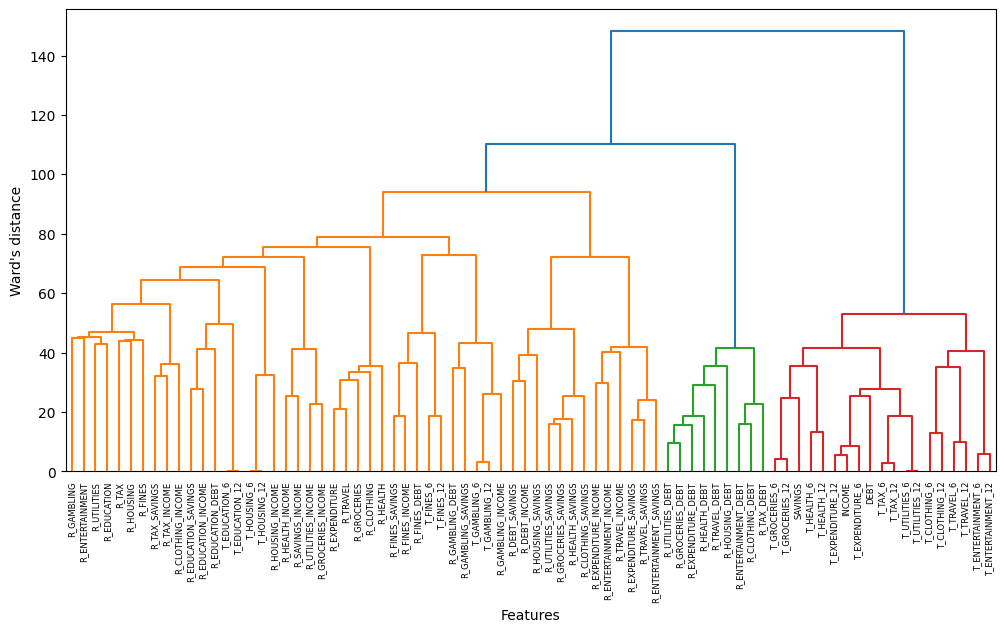

In [ ]:
# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(12, 6))
dendrogram(linked ,
            orientation='top',
            labels=df_transposed.index,
            distance_sort='descending',
            show_leaf_counts=True)

plt.xlabel('Features')
plt.ylabel("Ward's distance")

In [ ]:
num_clusters = 10 # Adjust the number of clusters as needed

labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [ ]:
# Find correlation between features and credit score
correlations = []
for col in df_features.columns:
  corr = credit_score['CREDIT_SCORE'].corr(credit_score[col])
  corr = round(corr, 3)
  correlations.append(corr)

In [ ]:
df_clusters = pd.DataFrame(list(zip(df_features.columns , labels , correlations)),
                          columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True)
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

,feature,cluster,corr,abs_corr
0,DEBT,1,-0.327,0.327
1,T_ENTERTAINMENT_12,1,0.109,0.109
2,T_ENTERTAINMENT_6,1,0.084,0.084
3,T_GROCERIES_6,1,-0.081,0.081
4,SAVINGS,1,0.079,0.079
5,T_GROCERIES_12,1,-0.073,0.073
6,T_HEALTH_12,1,0.057,0.057
7,T_TAX_12,1,0.038,0.038
8,T_TAX_6,1,0.036,0.036
9,INCOME,1,0.029,0.029


In [ ]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist()
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

Text(0.5, 1.0, 'Cluster 2')

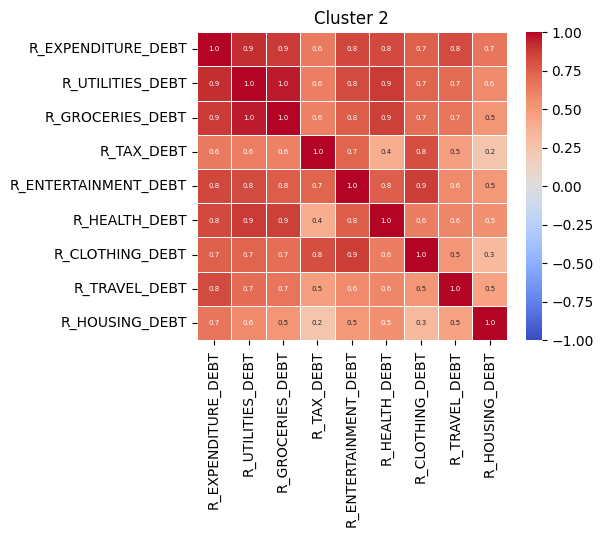

In [ ]:
# Plot correlations for features in clusters 2
corr = df_features[c2_features].corr()

# plot correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt=".1f",
            annot_kws={"size": 5},
            vmin=-1, vmax=1)
plt.title('Cluster 2')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'R_EXPENDITURE_DEBT'),
  Text(0, 1.5, 'R_UTILITIES_DEBT'),
  Text(0, 2.5, 'R_GROCERIES_DEBT'),
  Text(0, 3.5, 'R_TAX_DEBT'),
  Text(0, 4.5, 'R_ENTERTAINMENT_DEBT'),
  Text(0, 5.5, 'R_HEALTH_DEBT'),
  Text(0, 6.5, 'R_CLOTHING_DEBT'),
  Text(0, 7.5, 'R_TRAVEL_DEBT'),
  Text(0, 8.5, 'R_HOUSING_DEBT'),
  Text(0, 9.5, 'R_ENTERTAINMENT_INCOME'),
  Text(0, 10.5, 'R_ENTERTAINMENT_SAVINGS'),
  Text(0, 11.5, 'R_EXPENDITURE_SAVINGS'),
  Text(0, 12.5, 'R_EXPENDITURE_INCOME'),
  Text(0, 13.5, 'R_TRAVEL_SAVINGS'),
  Text(0, 14.5, 'R_TRAVEL_INCOME')])

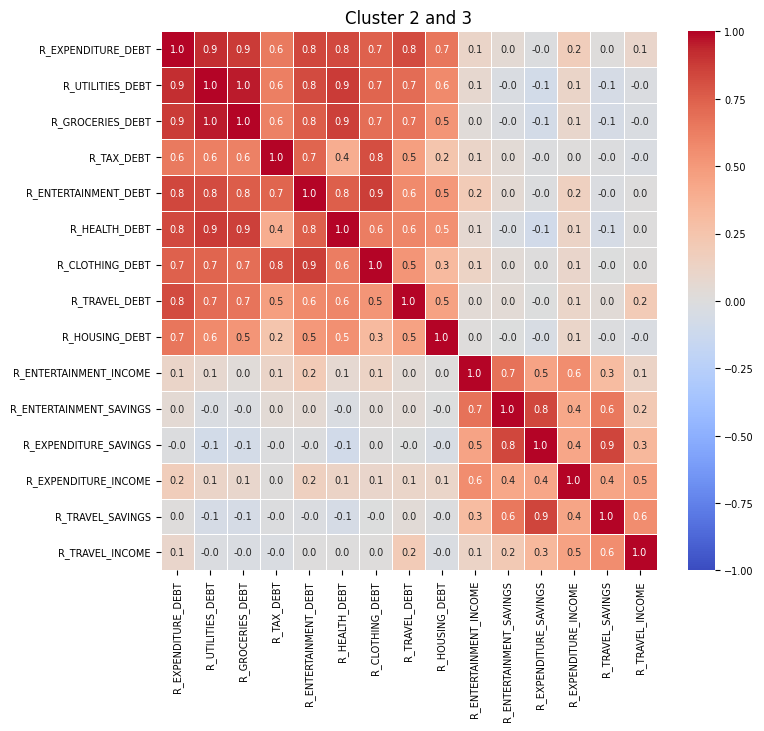

In [ ]:
# Plot correlations for features in cluster 2 and 3
corr = df_features [np.append(c2_features, c3_features)].corr()

# plot correlation matrix
plt.figure(figsize=(8, 7))
sns. heatmap(corr,
      annot=True,
      cmap='coolwarm',
      linewidths=0.5,
      fmt=".1f",
      annot_kws={"size": 7},
      vmin =- 1, vmax=1)
plt.title('Cluster 2 and 3')
plt.xticks(size=7)
plt.yticks(size=7)

# change size of colorbar labels
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=7)
plt.xticks(size=7)
plt.yticks(size=7)